In [1]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
# Load the statepoint file
sp = openmc.StatePoint("statepoint.40.h5")

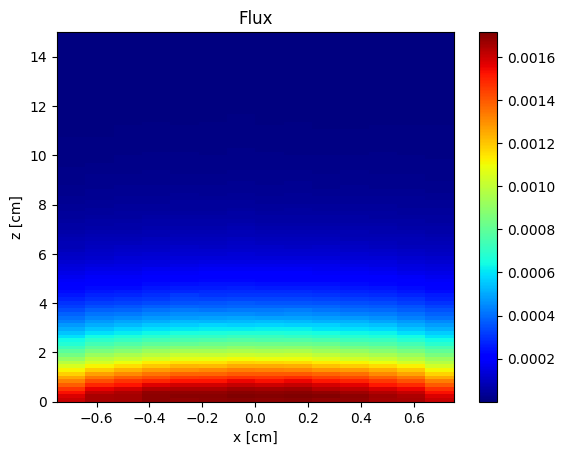

In [3]:
tally = sp.get_tally(name="flux")
df = tally.get_pandas_dataframe()
df.columns = ["x", "y", "z", "nuclide", "score", "mean", "std.dev."]

# Get the mesh
mesh = tally.find_filter(openmc.MeshFilter).mesh
x_centers = (mesh.x_grid[1:] + mesh.x_grid[:-1]) / 2.0
z_centers = (mesh.z_grid[1:] + mesh.z_grid[:-1]) / 2.0

# Filter the mesh grid to include only z up to z_max
z_max = 15
z_centers_filtered = z_centers[z_centers <= z_max]
XX_filtered, ZZ_filtered = np.meshgrid(x_centers, z_centers_filtered)

# Filter the DataFrame to include only z up to z_max
df_filtered = df[df["z"] <= len(z_centers_filtered)]

# Filter the flux values to match the filtered mesh grid
flux_filtered = df_filtered["mean"].values
flux_filtered.shape = (len(z_centers_filtered), len(x_centers))

# Plot the flux
plt.pcolormesh(
    XX_filtered, ZZ_filtered, flux_filtered, shading="nearest", cmap=plt.get_cmap("jet")
)
plt.colorbar()
plt.title("Flux")
plt.xlabel("x [cm]")
plt.ylabel("z [cm]")
plt.show()

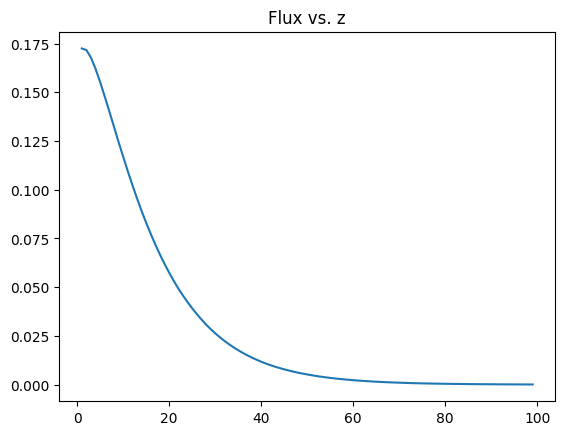

In [4]:
tally = sp.get_tally(name="flux2")
df = tally.get_pandas_dataframe()
df.columns = ["x", "y", "z", "nuclide", "score", "mean", "std.dev."]

plt.figure()
plt.plot(df["z"], df["mean"])
plt.title("Flux vs. z")
plt.show()